>[Q1](#scrollTo=d7Qa-15lQorM)

>>[1](#scrollTo=-L0y-Y-aWiq8)

>>[2](#scrollTo=e_W06ILeZVrF)

>[Q2](#scrollTo=U-egGta_rZb7)

>>[2](#scrollTo=tDiXyiaCXOJp)

>>[5](#scrollTo=rgmtXj5mP9jd)

>[Q3](#scrollTo=z9nYxw5IZiwv)



In [89]:
!pip install -qq pyomo
!apt-get install -y -qq glpk-utils
!pip install -q pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [90]:
import numpy as np
import pyomo.environ as pyo
from matplotlib import pyplot as plt
from pulp import *
import networkx as nx
from matplotlib import pyplot as plt, collections

# Q1

## 1

In [91]:
demands = [125, 175, 225, 250, 225, 200]

price = [
    [1e6, 2.5],
    [2.5, 1e6],
    [1.6, 2],
    [1.4, 1],
    [0.8, 1],
    [1.4, 0.8]
]

supply = [550, 700]

factories = range(len(supply))
cities = range(len(demands))

factory = ["Arnhem", "Gouda"]
city = ["London", "Berlin", "Maastricht", "Amsterdam", "Utrecht", "The Hague"]

In [92]:
model = pyo.ConcreteModel()
model.x = pyo.Var(factories, cities, domain=pyo.NonNegativeReals)

model.cost = pyo.Objective(
    expr=sum(price[c][f] * model.x[f, c] for c in cities for f in factories),
    sense=pyo.minimize
)

model.demand_constraints = pyo.ConstraintList()
for c in cities:
    model.demand_constraints.add(
        sum(model.x[f, c] for f in factories) == demands[c]
    )

model.supply_constraints = pyo.ConstraintList()
for f in factories:
    model.supply_constraints.add(
        sum(model.x[f, c] for c in cities) <= supply[f]
    )

In [93]:
solver = pyo.SolverFactory('glpk')
solver.solve(model)

print("Optimal Solution:")
for f in factories:
    for c in cities:
        print(f"{factory[f]} factory to {city[c]} City: {model.x[f, c]()}")

print("\nTotal Cost:", model.cost())

Optimal Solution:
Arnhem factory to London City: 0.0
Arnhem factory to Berlin City: 175.0
Arnhem factory to Maastricht City: 225.0
Arnhem factory to Amsterdam City: 0.0
Arnhem factory to Utrecht City: 150.0
Arnhem factory to The Hague City: 0.0
Gouda factory to London City: 125.0
Gouda factory to Berlin City: 0.0
Gouda factory to Maastricht City: 0.0
Gouda factory to Amsterdam City: 250.0
Gouda factory to Utrecht City: 75.0
Gouda factory to The Hague City: 200.0

Total Cost: 1715.0


## 2

In [94]:
new_supply = [600, 650]

In [95]:
model = pyo.ConcreteModel()
model.x = pyo.Var(factories, cities, domain=pyo.NonNegativeReals)

model.cost = pyo.Objective(
    expr=sum(price[c][f] * model.x[f, c] for c in cities for f in factories),
    sense=pyo.minimize
)

model.demand_constraints = pyo.ConstraintList()
for c in cities:
    model.demand_constraints.add(
        sum(model.x[f, c] for f in factories) == demands[c]
    )

model.supply_constraints = pyo.ConstraintList()
for f in factories:
    model.supply_constraints.add(
        sum(model.x[f, c] for c in cities) <= new_supply[f]
    )

In [96]:
solver = pyo.SolverFactory('glpk')
solver.solve(model)

print("Optimal Solution:")
for f in factories:
    for c in cities:
        print(f"{factory[f]} factory to {city[c]} City: {model.x[f, c]()}")

print("\nTotal Cost:", model.cost())

Optimal Solution:
Arnhem factory to London City: 0.0
Arnhem factory to Berlin City: 175.0
Arnhem factory to Maastricht City: 225.0
Arnhem factory to Amsterdam City: 0.0
Arnhem factory to Utrecht City: 200.0
Arnhem factory to The Hague City: 0.0
Gouda factory to London City: 125.0
Gouda factory to Berlin City: 0.0
Gouda factory to Maastricht City: 0.0
Gouda factory to Amsterdam City: 250.0
Gouda factory to Utrecht City: 25.0
Gouda factory to The Hague City: 200.0

Total Cost: 1705.0


# Q2

In [97]:
Q = np.array([[48, 12], [8, 8]])
q = np.array([13, 23])
p = 4
x0 = np.array([23.0, 37.0])

In [98]:
def f(x):
  return 0.5 * x.T @ Q @ x+ q.T @ x + p
def grad_f(x):
  return Q @ x + q

In [99]:
def gradient_descent(X0, gradient, lr=0.05, epoch=10):
    X = X0.copy()
    log = []
    log.append(X0.copy())

    for _ in range(epoch):

        dir = gradient(X)

        X -= lr * dir

        log.append(X.copy())

    return X, np.array(log)

## 2

**lr = 0.02**

In [100]:
x, log = gradient_descent(x0, grad_f, lr = 0.02, epoch=80)

Optimal x: [ 0.59664479 -3.47018818]


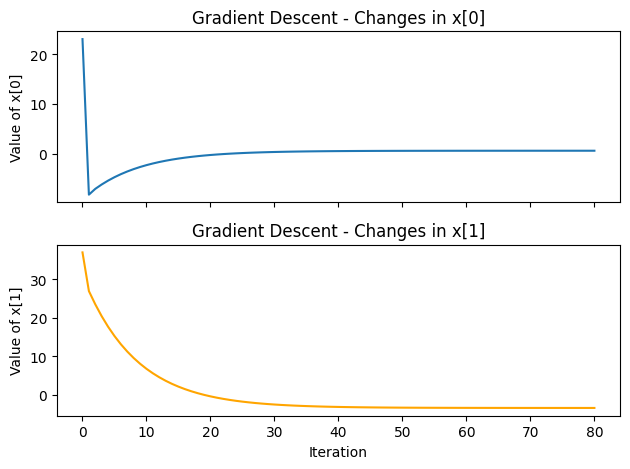

In [101]:
print("Optimal x:", x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(log[:, 0], label='x[0]')
ax1.set_ylabel('Value of x[0]')
ax1.set_title('Gradient Descent - Changes in x[0]')

ax2.plot(log[:, 1], label='x[1]', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value of x[1]')
ax2.set_title('Gradient Descent - Changes in x[1]')

plt.tight_layout()
plt.show()

## 5

**lr  = 0.001**

In [102]:
x, log = gradient_descent(x0, grad_f, lr = 0.001, epoch=1500)

Optimal x: [ 0.59545739 -3.46600544]


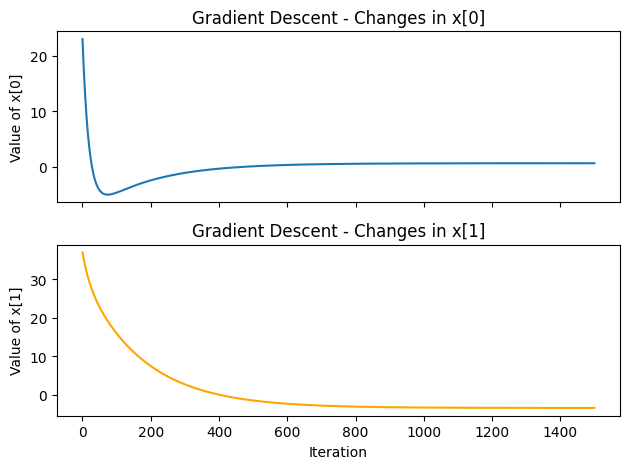

In [103]:
print("Optimal x:", x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(log[:, 0], label='x[0]')
ax1.set_ylabel('Value of x[0]')
ax1.set_title('Gradient Descent - Changes in x[0]')

ax2.plot(log[:, 1], label='x[1]', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value of x[1]')
ax2.set_title('Gradient Descent - Changes in x[1]')

plt.tight_layout()
plt.show()

**lr = 0.1**

In [104]:
x, log = gradient_descent(x0, grad_f, lr = 0.1, epoch=80)

Optimal x: [8.06888841e+49 1.52707576e+49]


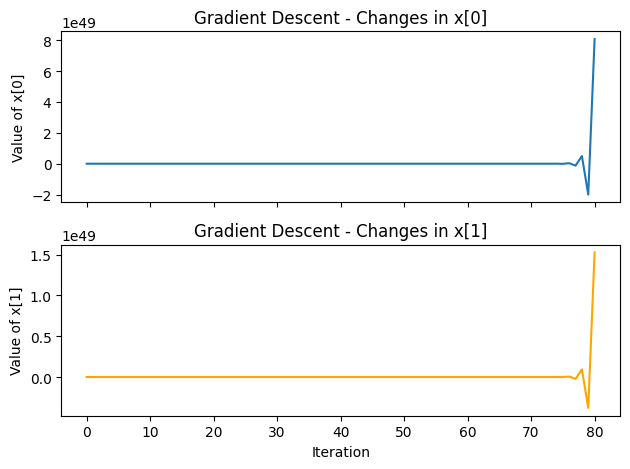

In [105]:
print("Optimal x:", x)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(log[:, 0], label='x[0]')
ax1.set_ylabel('Value of x[0]')
ax1.set_title('Gradient Descent - Changes in x[0]')

ax2.plot(log[:, 1], label='x[1]', color='orange')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Value of x[1]')
ax2.set_title('Gradient Descent - Changes in x[1]')

plt.tight_layout()
plt.show()

# Q3

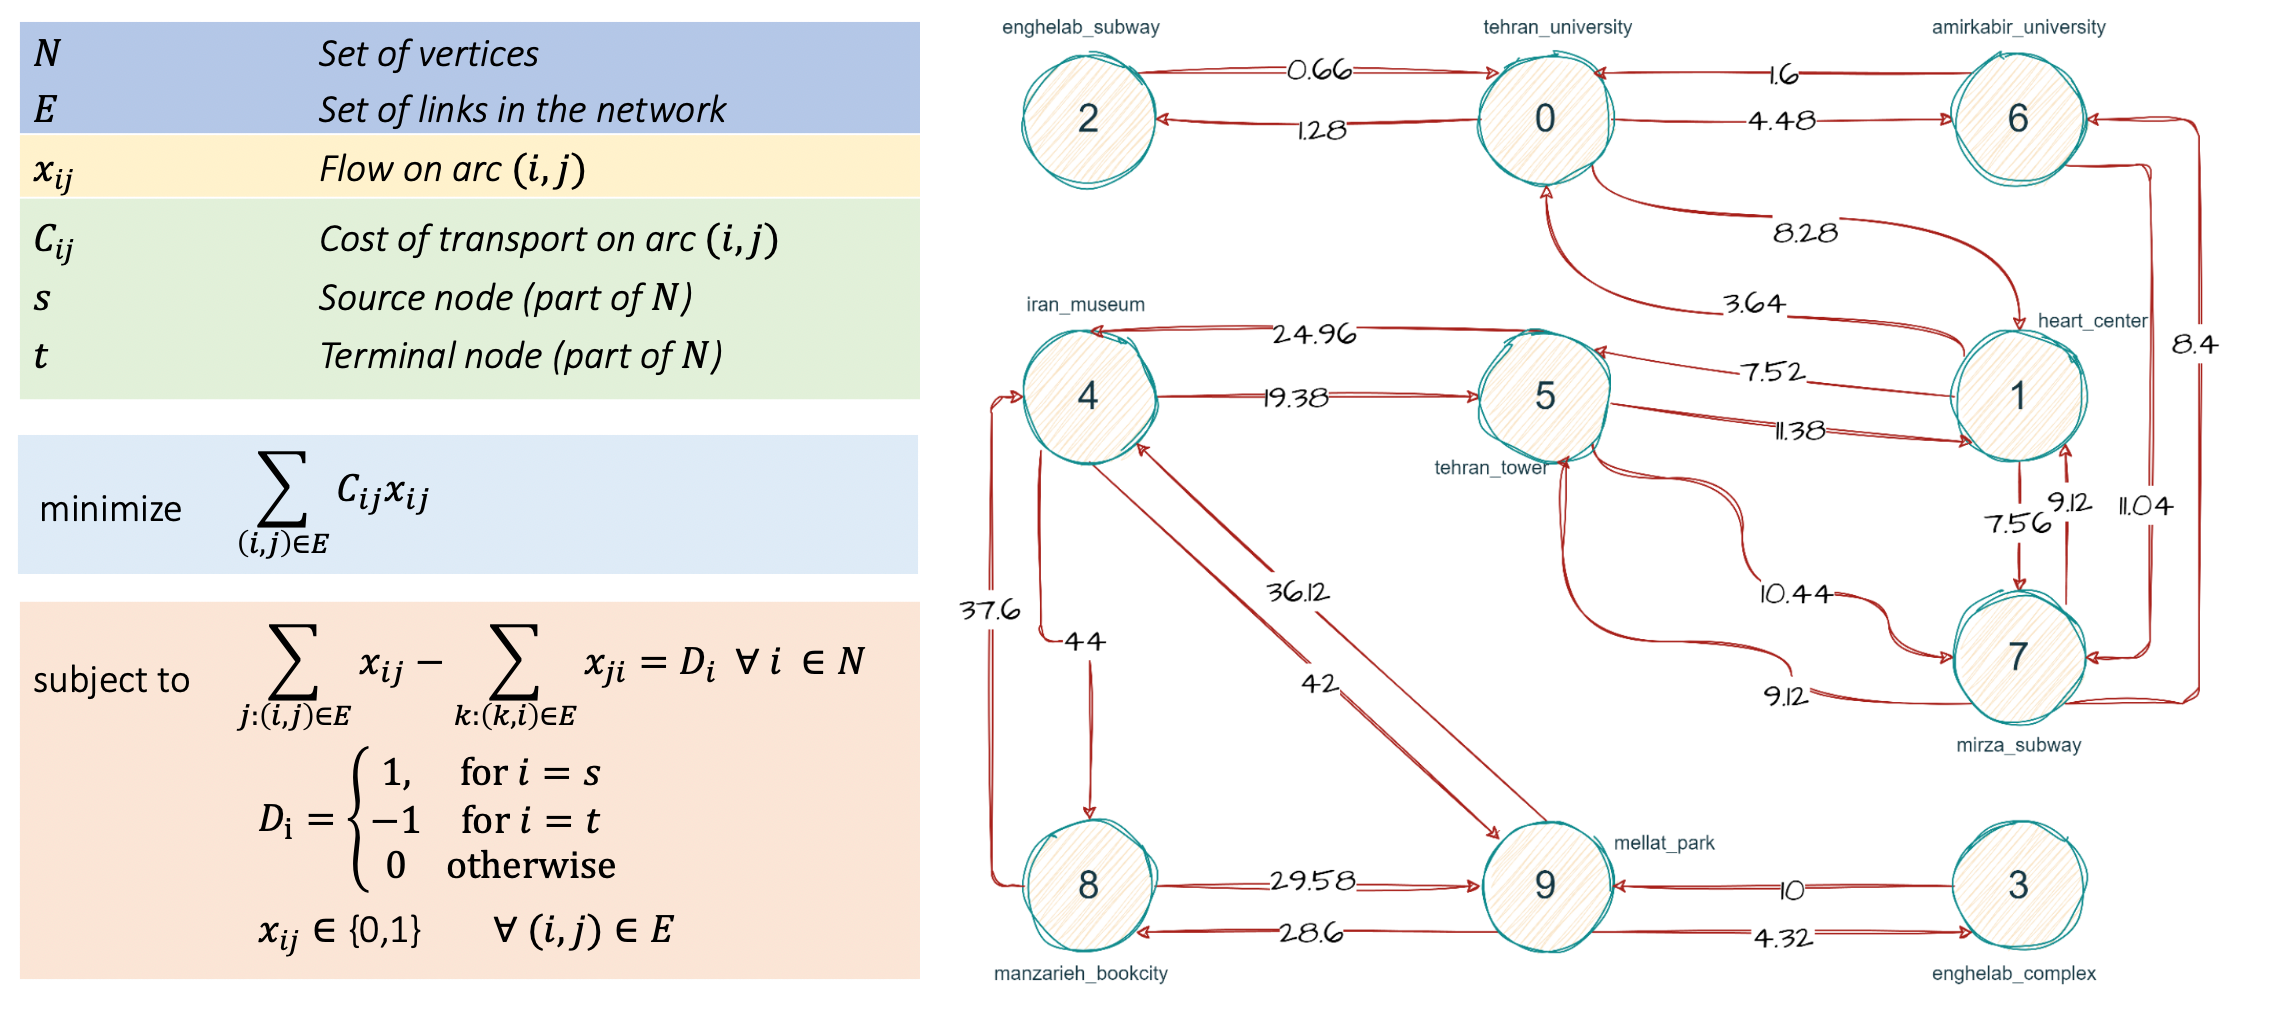

[Source](https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp)


In [106]:
class traveling_path_problem():

  def __init__(self, num_points, s, t, C):
    self.prob = LpProblem('prob', LpMinimize)

    self.N = [str(i) for i in range(num_points)]
    self.D = {node: 1 if node == s else -1 if node == t else 0 for node in self.N}
    self.E = [(i,j) for i in self.N for j in self.N if i in C.keys() if j in C[i].keys()]

  def solve(self):


    x = LpVariable.dicts('x', self.E,  lowBound = 0, upBound = 1, cat = LpInteger)

    self.prob += lpSum([C[i][j]*x[i,j] for (i,j) in self.E])

    for i in self.N:
        self.prob += (lpSum([x[i,j] for j in self.N if (i,j) in self.E])
                - lpSum([x[k,i] for k in self.N if (k,i) in self.E])) == self.D[i]


    status = self.prob.solve()

    print(f'STATUS\n{LpStatus[status]}\n')
    path = []

    for i in self.N:
        for j in self.N:
            if (i, j) in self.E and value(x[i, j]) == 1:
                path.append((i, j))

    total_cost = value(self.prob.objective)

    return path, total_cost

  def plotter(self, position):

    flow = [v.varValue*3 for v in self.prob.variables()]
    G = nx.Graph()
    G.add_nodes_from(self.N)
    G.add_edges_from(self.E)
    fig, ax = plt.subplots()
    nx.draw(G, pos=position, with_labels=True, ax=ax)
    lines = []
    for (i,j) in self.E:
        lines.append([(position[i][0], position[i][1]),(position[j][0], position[j][1])])
    lc = collections.LineCollection(lines, linewidth=flow, colors='r')
    ax.add_collection(lc)

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_title("Tehran Map")
    plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

In [107]:
C = {
    '0': {'1': 8.28, '2': 1.28, '6': 4.48},
    '1': {'0': 3.64, '5': 7.52, '7': 7.56},
    '2': {'0': 0.66},
    '3': {'9': 10},
    '4': {'5': 19.38, '8': 44, '9': 42},
    '5': {'1': 11.38, '4': 24.96, '7': 10.44},
    '6': {'0': 1.6, '7': 11.04},
    '7': {'1': 9.12, '5': 9.12, '6': 8.4},
    '8': {'4': 37.6, '9': 29.58},
    '9': {'3': 4.32, '4': 36.12, '8': 28.6}
}

num_points = 10
s = '1' #start
t  = '9' #terminal

position = {'0': [35.702, 51.369], '1': [35.721, 51.388], '2': [35.701,51.39],'3': [35.784, 51.398], '4': [35.753, 51.426],
            '5': [35.742, 51.399], '6': [35.703, 51.41], '7': [35.728, 51.417], '8': [35.79, 51.457], '9': [35.777, 51.41]}

STATUS
Optimal

Total Cost =  74.48
Path =  [('1', '5'), ('4', '9'), ('5', '4')]


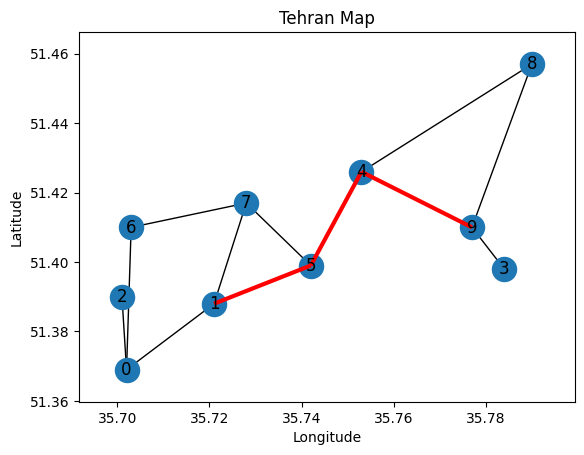

In [108]:
problem = traveling_path_problem(num_points, s, t, C)

path, total_cost = problem.solve()

print("Total Cost = ", round(total_cost, 2))
print("Path = ", path)


problem.plotter(position)